In [ ]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Reading the csv file
df=pd.read_csv('airlines_reviews.csv')

In [ ]:
# Displaying first 5 rows of the dataset
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In [ ]:
# Displaying the shape of the dataset
df.shape

(8100, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [ ]:
df.describe()

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,3.414815,3.569877,3.384074,3.636790,3.148642,5.632469
std,1.397183,1.527436,1.455694,1.309564,1.589377,3.523664
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [ ]:
df.columns

Index(['Title', 'Name', 'Review Date', 'Airline', 'Verified', 'Reviews',
       'Type of Traveller', 'Month Flown', 'Route', 'Class', 'Seat Comfort',
       'Staff Service', 'Food & Beverages', 'Inflight Entertainment',
       'Value For Money', 'Overall Rating', 'Recommended'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Title,0
Name,0
Review Date,0
Airline,0
Verified,0
Reviews,0
Type of Traveller,0
Month Flown,0
Route,0
Class,0


In [ ]:
unique_airlines = df['Airline'].unique()
print(unique_airlines)

['Singapore Airlines' 'Qatar Airways' 'All Nippon Airways' 'Emirates'
 'Japan Airlines' 'Turkish Airlines' 'Air France' 'Cathay Pacific Airways'
 'EVA Air' 'Korean Air']


In [ ]:
unique_type_traveller= df['Type of Traveller'].unique()
print(unique_type_traveller)

['Solo Leisure' 'Family Leisure' 'Business' 'Couple Leisure']


In [ ]:
# Get unique values of 'Moth Flown' without the year
unique_month_flown = df['Month Flown'].str.split(' ').str[0].unique()
print(unique_month_flown)

['December' 'February' 'January' 'November' 'September' 'October' 'May'
 'August' 'June' 'April' 'July' 'March']


In [ ]:
unique_class= df['Class'].unique()
print(unique_class)

['Business Class' 'Economy Class' 'Premium Economy' 'First Class']


In [ ]:
# Initialize lemmatizer and stopwords
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function for text cleaning and preprocessing
def preprocess_text(text):

    # Remove punctuation and special characters
    text = str.translate(text, str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to a single string
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to the 'Reviews' column
nltk.download('wordnet')
df['Cleaned_Reviews'] = df['Reviews'].apply(preprocess_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Preview the cleaned data
df[['Reviews', 'Cleaned_Reviews']]

,Reviews,Cleaned_Reviews
0,Flight was amazing. The crew onboard this fl...,Flight amazing The crew onboard flight welcomi...
1,Booking an emergency exit seat still meant h...,Booking emergency exit seat still meant huge d...
2,Excellent performance on all fronts. I would...,Excellent performance front I would definitely...
3,Pretty comfortable flight considering I was f...,Pretty comfortable flight considering I flying...
4,The service was consistently good from start ...,The service consistently good start finish The...
...,...,...
8095,"KE124, Brisbane to Incheon (A330) and KE867,...",KE Brisbane Incheon A KE Incheon Ulaanbaatar A...
8096,Our recent flight was our fourth trip to the...,Our recent flight fourth trip UK year Sydney L...
8097,I flew Korean Air from Bali to Seoul in Pres...,I flew Korean Air Bali Seoul Prestige Class Bu...
8098,Seoul to Paris with Korean Air. I am traveli...,Seoul Paris Korean Air I traveling triathlon b...


In [ ]:
# Feature Engineering

In [ ]:
# Convert 'Review Date' to datetime format
df['Review Date'] = pd.to_datetime(df['Review Date'])


In [ ]:
# Extracting date features
df['Year Flown'] = df['Review Date'].dt.year
df['Month Flown'] = df['Review Date'].dt.month
df['Day '] = df['Review Date'].dt.day
df['Day of Week'] = df['Review Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Week of Year'] = df['Review Date'].dt.isocalendar().week  # Week of year

In [ ]:
# Length of review text
df['Review_Length'] = df['Cleaned_Reviews'].apply(len)
df['Review_Length']

,Review_Length
0,330
1,193
2,144
3,691
4,213
...,...
8095,491
8096,789
8097,733
8098,868


In [ ]:
# Word count in the review
df['Word_Count'] = df['Cleaned_Reviews'].apply(lambda x: len(x.split()))
df['Word_Count']

,Word_Count
0,53
1,28
2,18
3,98
4,32
...,...
8095,76
8096,115
8097,115
8098,127


In [ ]:
df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Title                   8100 non-null   object        
 1   Name                    8100 non-null   object        
 2   Review Date             8100 non-null   datetime64[ns]
 3   Airline                 8100 non-null   object        
 4   Verified                8100 non-null   object        
 5   Reviews                 8100 non-null   object        
 6   Type of Traveller       8100 non-null   object        
 7   Month Flown             8100 non-null   int32         
 8   Route                   8100 non-null   object        
 9   Class                   8100 non-null   object        
 10  Seat Comfort            8100 non-null   int64         
 11  Staff Service           8100 non-null   int64         
 12  Food & Beverages        8100 non-null   int64   

In [ ]:
df.columns

Index(['Title', 'Name', 'Review Date', 'Airline', 'Verified', 'Reviews',
       'Type of Traveller', 'Month Flown', 'Route', 'Class', 'Seat Comfort',
       'Staff Service', 'Food & Beverages', 'Inflight Entertainment',
       'Value For Money', 'Overall Rating', 'Recommended', 'Cleaned_Reviews',
       'Year Flown', 'Day ', 'Day of Week', 'Week of Year', 'Review_Length',
       'Word_Count'],
      dtype='object')

In [ ]:
# Dropping columns that are not necessary

In [ ]:
df.drop(['Review Date', 'Title','Name','Route'], axis=1, inplace=True)

In [ ]:
# One-hot Encoding

In [ ]:
columns_categorical = df.select_dtypes(include=['object']).columns
columns_numerical = ['Review_Length', 'Word_Count','Year Flown','Month Flown','Day ','Day of Week','Week of Year']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


columns_categorical = df.select_dtypes(include=['object']).columns
# Exclude 'Cleaned_Reviews' from categorical columns
columns_categorical = columns_categorical[columns_categorical != 'Cleaned_Reviews']
columns_numerical = ['Review_Length', 'Word_Count','Year Flown','Month Flown','Day ','Day of Week','Week of Year']



In [ ]:

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
for column in columns_categorical:
    encoded_data = onehot_encoder.fit_transform(df[[column]])
    encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out([column]))
    df = pd.concat([df, encoded_df], axis=1)

# Dropping categorical columns, excluding 'Cleaned_Reviews'
df.drop(columns_categorical, axis=1, inplace=True)


In [ ]:
# 1. Sentiment Analysis DataFrame
sentiment_df = df[['Overall Rating', 'Cleaned_Reviews']]

# 2. Prediction DataFrame (all other columns except 'Cleaned_Review')
prediction_df = df.drop(['Cleaned_Reviews'], axis=1)

# Display the first few rows of both DataFrames
print("Sentiment Analysis DataFrame:")
print(sentiment_df.head())

print("\nPrediction DataFrame:")
print(prediction_df.head())


Sentiment Analysis DataFrame:
   Overall Rating                                    Cleaned_Reviews
0               9  Flight amazing The crew onboard flight welcomi...
1               3  Booking emergency exit seat still meant huge d...
2              10  Excellent performance front I would definitely...
3              10  Pretty comfortable flight considering I flying...
4              10  The service consistently good start finish The...

Prediction DataFrame:
   Month Flown  Seat Comfort  Staff Service  Food & Beverages  \
0            3             4              4                 4   
1            2             5              3                 4   
2            2             1              5                 2   
3            2             5              5                 5   
4            2             5              5                 5   

   Inflight Entertainment  Value For Money  Overall Rating  Recommended  \
0                       4                4               9         

# Visualizations

In [ ]:
from wordcloud import WordCloud
import plotly.express as px
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


### Histograms

In [ ]:
import plotly.express as px

# histograms for numerical features
def plot_histograms_plotly(df, numerical_columns):
    for col in numerical_columns:
        fig = px.histogram(df, x=col, nbins=20, title=f'Distribution of {col}')
        fig.update_layout(
            xaxis_title=col,
            yaxis_title="Frequency",
            template='plotly_dark'
        )
        fig.show()

# function call
numerical_columns = ['Overall Rating','Seat Comfort', 'Staff Service', 'Value For Money'] # removing'Review_Length', 'Word_Count', as they are continuous features
plot_histograms_plotly(df, numerical_columns)


Analysis for the histograms

Histogram 1 :
This graph shows as the heading suggests shows us teh distribution of the ratings across the dataframe. Looking at it we can say that the most common rating is 1 considering all the services with almost 200+ counts more than the rating 10.

Histogram 2:
The grapgh shows us the distribution of seat comfort across the airlines.
The highest frequency is for a seat comfort rating of 5, as many ratings indicate the seat to be very comfortable.
The lowest frequency is for a seat comfort rating of 2 which suggests that a lesser number of them were very uncomfortable with the seats.
The distribution has a positive skew with a higher range of the rating being given more as well, which means in general terms the seats were rated to be reasonably comfortable.

Histogtram 3:
The graph shows the distribution of staff service ratings.
The highest frequency is for a staff service rating of 5, indicating that many people found the staff service to be quite satisfactory.
The lowest frequency is for a staff service rating of 2 suggesting that less ratings were given to quite unsatisfactory service only.
The curve is positively skewed as more of the higher service ratings dominate the proportion, which indicates that in general, the staff service was perceived to be more than adequate.

Histogram 4:
This graph indicates how the value for money appears to vary with different airlines.
The highest frequency occurs for a value for money index of 5; which suggest a sizeable proportion of people perceived the value for money to be satisfactory.
The lowest frequency occurs for a value for money index of 2, which mean that a section of respondents perceived the value for money to be poor.
The overall distribution is said to be positively skewed as a larger number of the sample assigned high value of money ratings. This implies that on the average, the ratings returned on value for money were quite favorable.



### Bar plots

In [ ]:
# for visulaizations : copy of the original dataframe before dropping columns
df_original = pd.read_csv('airlines_reviews.csv')

columns_categorical_original = df_original.select_dtypes(include=['object']).columns

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [ ]:
import plotly.express as px

def plot_categorical_barplots(df_original, columns_categorical_original):
    # ploting the distribution of all categorical features in the original dataframe as it is
    for column in columns_categorical_original:
        # Geting the  value counts and rename columns
        dframe = df_original[column].value_counts().reset_index()
        dframe.columns = [column, 'Count']  # Rename columns explicitly

        # Creating the bar plot
        fig = px.bar(dframe, x=column, y='Count',
                     labels={column: column, 'Count': 'Count'},
                     title=f'Distribution of {column}')
        fig.show()

# function call
plot_categorical_barplots(df_original, ['Airline', 'Type of Traveller', 'Month Flown', 'Class', 'Recommended'])


Bar plots for the categorical variables:
bar plot 1 :shows the distribution of flights across various airlines. We can conclude that:
Top Airlines: The maximum number of flights are by Turkish Airlines and Qatar Airways, reflecting their market dominance. Strong Contenders: Emirates and Singapore Airlines come quite a distance after, reflecting their strong presence. The Flight on a Decreasing Trend: As we go down the list, flights for each airline decrease, showing a hierarchy in market share.

Barplot 2: The chart below depicts the distribution of travelers according to their type. Solo leisure travelers are the most common category and take up the largest share of the whole, which means many people prefer traveling alone for leisure. The next significant percentage is constituted by couple leisure and family leisure travelers, which also means the tendency of group travel, especially couples and families, is also widespread. Business travelers represent the smallest portion. This could mean that the dataset is biased towards leisure travel or that the specific context of the data-for example, a particular destination or travel agency-is more oriented to leisure activities.

Barplot 3: The bar chart represents the distribution of flights across different months. From this data, a seasonal pattern is very evident, with peak travel periods occurring in November and December, likely due to holiday travel. Increased flights can also be recorded in the months of June, July, and August due to summer vacations. The annual up-and-down graph depicts that traveling is indeed dependent on economic circumstances and other events outside the nation's control. The chart basically captures air travel in its seasonality and what determines its demand.

Barplot 4: The bar plot represents the distribution of passengers among different classes of travel. Most chosen is the economy class, followed by business, whereas premium economy and first class are low in frequency. That would mean most travelers go for cheap and affordable means, while the rest prefer higher-end traveling. That probably reflects leisure and business, with the latter also using economy class.

Barplot 5: The distribution of recommendations, most of the responses are positive, and many have given "yes" recommendations. Whereas, negative recommendations, which are few, are denoted as "no." Hence, the level of satisfaction or approval is very high, be it customer experiences, product reviews, or service ratings. Since most people have expressed satisfaction or approved of the same, the overall sentiment is positive.




### BoxPlots

In [ ]:
def plot_box_plott(df_original, columns_numerical):
    # box plots for numerical features
    for column in columns_numerical:
        fig = px.box(df_original, y=column, title=f'Box Plot for the  {column}')
        fig.show()

# function call
plot_box_plott(df, columns_numerical)


Box Plot Analysis:

Box Plot 1 :
The box plot represents the distribution of review lengths. The median review length is approximately 500 characters, meaning half of the reviews are less than this. The interquartile range indicates that most reviews lie between 250 and 750 characters. However, the presence of outliers shows that some reviews are much longer. The right-skewed distribution suggests there are a few very long reviews, while the majority of them are relatively shorter. This variation in review length can be useful for drawing valuable insights on the depth and detail of user feedback.

Box plot 2:
The box plot shows the distribution of the word counts. The median is close to 100 words, and half of the text samples have fewer than 100 words. The IQR indicates that most word counts are approximately between 50 and 150 words.

However, the considerable number of outliers above the upper whisker means that some text samples contain many more words than the majority of the samples. The outliers may indicate long articles, essays, or documents. The distribution seems to be right-skewed; it has a longer tail towards the right side. This indicates that there are only a few text samples that are really long and mostly short ones. This dispersion about word count can give insight into diversity in text content and perhaps difference in complexity or topic.

Box Plot 3:
The boxplot visualizes the distribution of years flown. The median year appears to be around the year 2020, as half of the flights have occurred before this year and half after. The interquartile range would suggest most flight years fall between 2018 and 2022.

There are no obvious outliers, indicating that the distribution is fairly compact. The distribution looks approximately symmetric and has no great skewness. That suggests that flight data across the years are relatively evenly distributed.

This visualization will help analyze the trend in flight activities over time. For example, if the median year is far lower or higher, it would suggest changes in the pattern of flights; also, the interquartile range will demonstrate the increase or decrease in time for flight activities.

Box Plot 4:
The box plot visualizes the flight months. The median month appears to be at about 8, suggesting that half of the flights occurred before the 8th month of the year, half afterwards. The interquartile range suggests most flight months between the 4th and 10th month.

There are no visible outliers, suggesting that the distribution is rather compact. The distribution looks approximately symmetric with no great skew. That would suggest the flight data are evenly distributed across the months.

This visualization can indicate seasonal trends in flight activity. For example, if the median month was radically lower or higher, this may indicate a specific period of peak travel. Additionally, the interquartile range will give the months with the highest concentration of flights.

Box Plot 5:
The box plot visualizes the distribution of days. The median day appears to be around 20, indicating that half of the data points occurred before the 20th day of the month and half after. The interquartile range suggests that most data points fall between approximately 10 and 25.

There are no visible outliers, which suggests that the distribution is rather compact. The distribution is approximately symmetric, showing no great skewness. This reflects that the data is spread evenly across the days of the month.

This visualization can help detect any patterns in the data related to the day of the month. A very low or high median day may suggest a particular period of activity or rest, respectively. The interquartile range will also indicate days of the month when data points are most crowded.

Box Plot 6:
The box plot visualizes the distribution of days of the week. It seems that the median day is about 3, which suggests that half of the data points occurred before the 3rd day of the week (Wednesday), and half after. The interquartile range would suggest that most data points fall between approximately 1 (Monday) and 5 (Friday).

There are no visible outliers, suggesting that the distribution is relatively compact. The distribution appears roughly symmetric, with no significant skewness. This would suggest that the data falls relatively evenly across the days of the week.

This visualization helps to identify the pattern of the day of the week in the data. For example, if the median day is significantly lower or higher, it can indicate that a certain day may have more activity. Also, interquartile range conveys which day has the maximum density of data points.

Box Plot 7:
The box plot visualizes the distribution of weeks of the year. The median week seems to be around 30, indicating that half of the data points occurred before the 30th week of the year and half after. The interquartile range suggests that most data points fall between approximately 20 and 40.

There are no obvious outliers, which suggests the distribution is relatively compact. The distribution is roughly symmetric with no large skew. This would suggest the data are similarly spread out across the weeks of the year.

This visualization can help detect patterns in the data due to the time of year. If the median week was much higher or lower, it would tend to indicate a specific period of activity or inactivity. Also, the interquartile range can reveal the weeks with the highest concentration of data points.


### Heatmap

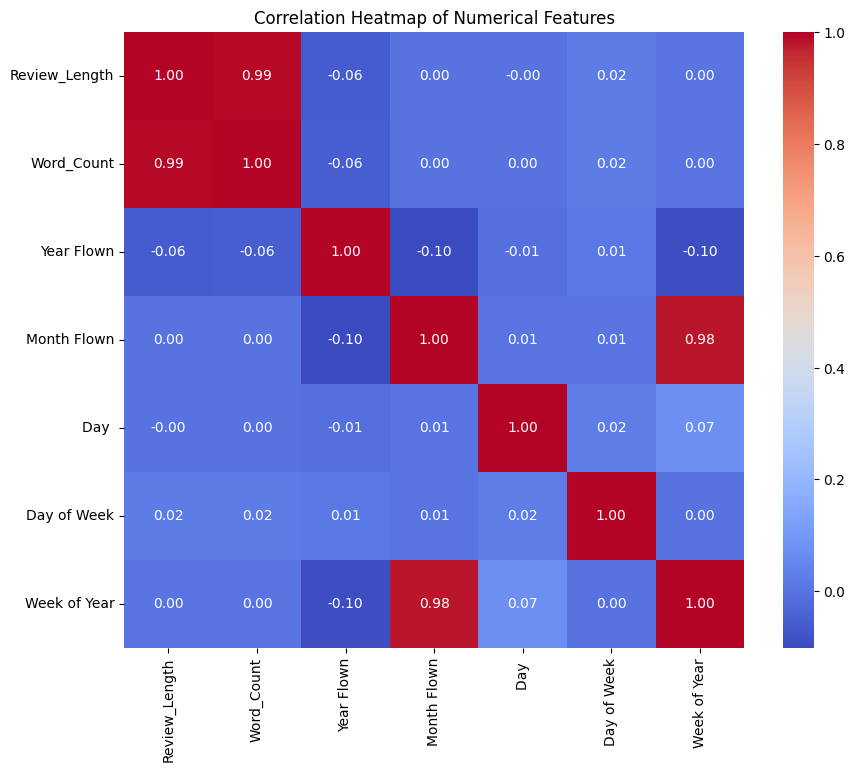

In [ ]:
def plot_heatmap_matrix(df_original, columns_numerical):
    correlation_matrix = df_original[columns_numerical].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

# function call
plot_heatmap_matrix(df, columns_numerical)


That is heat map gives a relationship between numbers of features in the data are as follows.

Very positively correlated items: The length of review and word count: The two are positively correlated at a very high value of 0.99. The longer the review, more words it usually has, or vice versa. Certainly like this, because along with the length the number of words would authoritatively affect review lengths.

Moderate positive correlation:
Between month flown and week of year: The two features are positively correlated and equal to 0.98. In fact, those features had such moderately strong associations between month and week of the year, which one would expect.

Weak Correlation:
Really, the most other pairs of attributes are weakly related to each other or even not related; they surely do not show any significant linear variation from each other.

More Observations:
Indeed, the year flown is less negatively correlated with month flown and week of year, making intuitive sense as the numbers increase in year, month, and week-their combination would provide a small negative correlation. Day and Day of Week have a weak positive correlation, which makes sense since the day of the week is determined by the day of the month.

In fact, the heat map tells that review length and word count are the only two ones that correlate high while all other parameters, very weakly related to each other, reflect linearly. Such knowledge will be useful to feature-selection, building models, and data examination.


### WordCloud

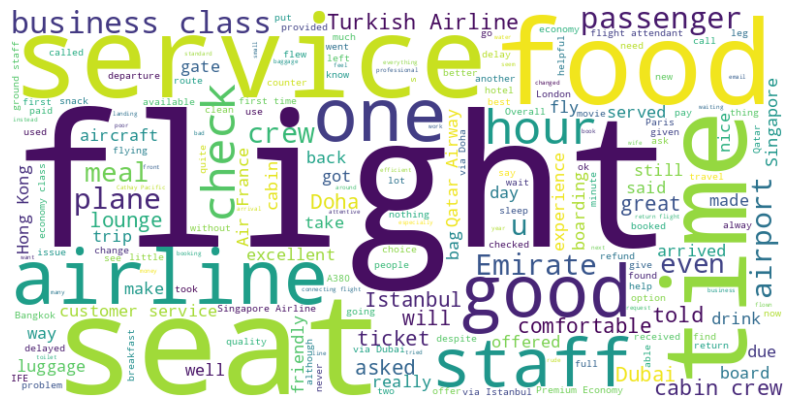

In [ ]:
#For the reviews before cleaning them
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allreviews = ' '.join(df_original['Reviews'])

# Generating the colud
wc = WordCloud(width=800, height=400, background_color='white').generate(allreviews)

# Displaying it
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


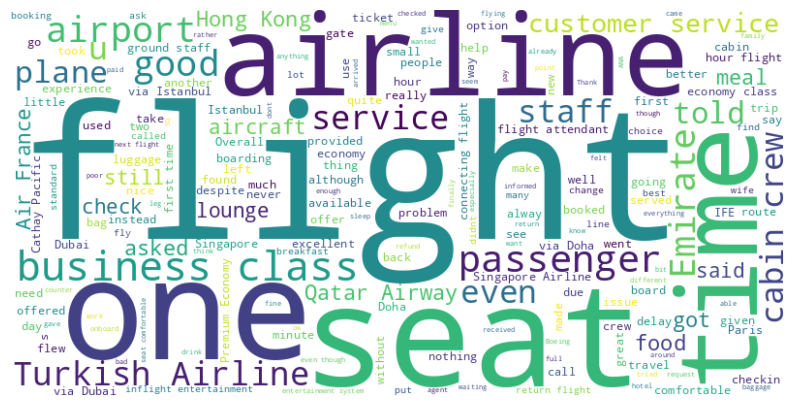

In [ ]:
#For the reviews after cleaning them
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allreviews = ' '.join(sentiment_df['Cleaned_Reviews'])

# Generating the colud
wc_cleaned = WordCloud(width=800, height=400, background_color='white').generate(allreviews)

# Displaying it
plt.figure(figsize=(10, 6))
plt.imshow(wc_cleaned, interpolation='bilinear')
plt.axis('off')
plt.show()


Word cloud from airline reviews:

Positive: Flight: The most used word as most reviews refer to flight experiences. Service: This informs that customers appreciate good services from the airline's staff. Staff: This makes it possible to further emphasize the importance of one factor that results in positive experiences. Food: Very indicative that quality and choices in food are also important to customers. Comfort: The comfort level that brings the indication such as seating and amenities is valued. Excellent: The word makes an indication of having had positive overall experiences.

Negative: Delay: It signifies the customer annoyance factor and reflects on the common problems associated with flight delays. Problem: This indicates that the customers find problems with all the travel experiences. Issue: The word further depicts more on issues or problems.

Other Notable Words: Doha: This means the word has to do with the visits made to Doha and shows that this place is among the frequent destinations or point of departure for reviews. Economy class: This shows that a great percentage reviews in Economy class; Business class: Indicating a smaller population has flown in business class. Air France: Indicating that Air France has been mentioned more in all reviews. Singapore Airlines: It shows that also Singapore Airlines is one of the most frequently referred to of the airlines in the reviews.
In fine, from this total word cloud, it seems customers consider the most essential elements as good flight service, comfort, and punctuality. Delays and problems are significant ones, indicating areas where airlines have room for improvement.


### Bi-grams

In [ ]:
import plotly.express as px
from nltk.util import ngrams
from collections import Counter

# Tokenizing cleaned reviews
all_reviews_tokens = ' '.join(df['Cleaned_Reviews']).split()

# Creating the bigrams
bigrams = ngrams(all_reviews_tokens, 2)
bigram_freq = Counter(bigrams)

# saving the top 10 bigrams in a variable
common_bigrams = bigram_freq.most_common(10)

bigram_labels = [' '.join(bigram) for bigram, _ in common_bigrams]
bigram_counts = [count for _, count in common_bigrams]

# making a dataframe with bigrams
bigram_df = pd.DataFrame({
    'Bigram': bigram_labels,
    'Frequency': bigram_counts
})

# bar chart using plotly
fig = px.bar(bigram_df, x='Frequency', y='Bigram', orientation='h',
             title='Top 10 Bigrams', labels={'Frequency': 'Count', 'Bigram': 'Bigram'},
             color='Frequency', color_continuous_scale='Blues')

fig.show()


The chart bar has given this name, 'Top 10 Bigrams', which throws light on the frequency of the most common two-word combinations, that is, bigrams, used in this data. Here are some important revelations:
Dominant Bigrams:
Turkish Airlines: It is the most frequently occurring bigram, which points out that this is the airline most frequently mentioned in this entire dataset.
Cabin Crew: With this bigram we could say that customers often base their experience with respect to the cabin crew, could be based on the services and interaction .
Customer Service: By this bigram we can say that most of the reviews can also be based on the kind of customer serviceand it becomes a matter of discussion in the reviews.
Qatar Airways: We can say that most of the reviews are coming from Qatar or that the customers that have used the service mostly have something to say , good /bad.


### Trigrams:

In [ ]:
trigrams = ngrams(all_reviews_tokens, 3)
trigram_freq = Counter(trigrams)

# saving the top 10 in a variable
common_trigrams = trigram_freq.most_common(10)

trigram_labels = [' '.join(trigram) for trigram, _ in common_trigrams]
trigram_counts = [count for _, count in common_trigrams]

# making a dataframe with bigrams
trigram_df = pd.DataFrame({
    'Trigram': trigram_labels,
    'Frequency': trigram_counts
})

# bar chart
fig = px.bar(trigram_df, x='Frequency', y='Trigram', orientation='h',
             title='Top 10 Trigrams', labels={'Frequency': 'Count', 'Trigram': 'Trigram'},
             color='Frequency', color_continuous_scale='Reds')

fig.show()


Dominant Trigrams:
The cabin crew: This is the most frequent trigram, proving that customers frequently mention cabin crew in their reviews-most probably about their services or interactions.
via Hong Kong: This trigram shows that Hong Kong is quite a prominent remark in this dataset about transit locations.
The flight attendant: This could imply that the flight attendants would mostly receive mentions in the review.  
Other Noteworthy Trigrams:
I told I: It indicates that customers mostly express themselves most personally about things, more likely in personal modes.
I would recommend: It means that the airline, to certain services, is probably going to be recommended by customers.
long haul flight: This shows that, pretty much, long flight is generally targeted in the reviews.
I would like: This means that customers usually specify what they want.
This is my first time: First-time travelers share their experiences.



#### Distribution of sentiment on the whole

In [ ]:
import plotly.express as px

def plot_sentiment_based_on_recommended(df):
    # Map 'Recommended' to sentiment labels: 'Positive' for "yes", 'Negative' for "no"
    df['Sentiment_Label'] = df['Recommended'].apply(lambda x: 'Positive' if x.lower() == 'yes' else 'Negative')

    # Plot sentiment distribution
    sentiment_count = df['Sentiment_Label'].value_counts().reset_index()
    sentiment_count.columns = ['Sentiment', 'Count']
    fig = px.bar(sentiment_count, x='Sentiment', y='Count', title='Sentiment Distribution Based on Recommendation')
    fig.show()

# Function call
plot_sentiment_based_on_recommended(df_original)



Key Observations:
Positive Sentiment Dominates: The "Positive" bar is the tallest, indicating that the majority of the recommendations are from positive sentiments.
Negative Sentiment is Less Prevalent: The height of the bar for "Negative" is less, showing that negative sentiment among the recommendations is less frequent.
Possible Understandings:
Recommendation Bias towards the Positive: This clearly shows that people are more likely to recommend the things they like and with which they have had positive experiences. The dominating sentiment of positive is based on the fact that they will be in a better position to recommend what they are really satisfied with, hence giving a greater number of recommendations with a positive sentiment. In addition, social desirability bias makes people give recommendations leaning toward positivity.


#### Top 10 terms based on TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def plot_tfidf(df, column):
    # Vectorizinf the reviews using TFIDF
    tfidf = TfidfVectorizer(stop_words='english', max_features=10)
    tfidf_matrix = tfidf.fit_transform(df[column].dropna())
    feature_names = tfidf.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1

    tfidf_df = pd.DataFrame(list(zip(feature_names, tfidf_scores)), columns=['Term', 'TF-IDF Score'])
    tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)

    # the top 10 terms with the highest TF-IDF scores
    fig = px.bar(tfidf_df.head(10), x='Term', y='TF-IDF Score', title='Top 10 Terms Based on TF-IDF')
    fig.show()

# function call
plot_tfidf(df_original, 'Reviews')
